In [ ]:
import numpy as np
import cv2
from cloudsen12 import load_model_by_name

# Load B/W image
gray_img = cv2.imread("bw_image.png", cv2.IMREAD_GRAYSCALE)  # shape: (H, W)

# Normalize to 0-1 float32 and replicate to 4 channels (fake NIR + RGB)
gray_norm = gray_img.astype(np.float32) / 255.0
input_array = np.stack([gray_norm] * 4, axis=-1)  # shape: (H, W, 4)

# Load CloudSEN12 model (expects NIR, R, G, B order)
model = load_model_by_name(name="dtacs4bands")

# Predict
prediction = model.predict(np.expand_dims(input_array, axis=0))  # add batch dim


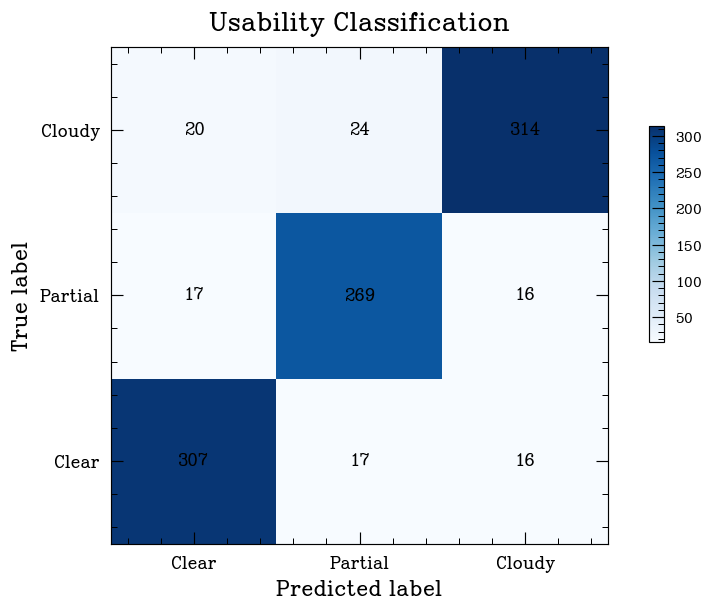

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Simulated data
labels = ["Clear", "Partial", "Cloudy"]
y_true = np.random.choice([0, 1, 2], size=1000)
y_pred = y_true.copy()
y_pred[np.random.choice(len(y_pred), 150, replace=False)] = np.random.choice([0, 1, 2], 150)

cm = confusion_matrix(y_true, y_pred)

# Plot manually
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(cm, interpolation='nearest', cmap='Blues')

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center", color="black", fontsize=12)

# Set axis ticks and labels
ax.set(xticks=np.arange(len(labels)),
       yticks=np.arange(len(labels)),
       xticklabels=labels,
       yticklabels=labels,
       xlabel='Predicted label',
       ylabel='True label',
       title='Usability Classification')

plt.setp(ax.get_xticklabels(), rotation=0, ha="center", fontsize=12)
plt.setp(ax.get_yticklabels(), fontsize=12)

# Custom colorbar
cbar_ax = fig.add_axes([0.92, 0.45, 0.02, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.tick_params(labelsize=10)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

